In [ ]:
import warnings
import math
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import Callback
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
def main():
    warnings.filterwarnings("ignore")

    datos = leeDatos()
    normdatos = normalizar(datos)

    print(datos)
    print(normdatos)

    ts_size = .25
    [trainSet, testSet] = splitDataSet(normdatos, test_size=ts_size, randSplit=True)

    trainModel, testModel = metodosML(trainSet, testSet)

    dif = testModel-testSet.iloc[:,4:]
    print('dubi dubi du')
    print(testSet.iloc[:,4:])
    print(testModel)
    print(dif)
    acc = (dif == -1).sum().sum()/len(testModel)
    print('wrong: ', (dif == -1).sum().sum())
    print('accuracy: ', (1-acc).round(2)*100, ' %')

def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/iris.csv", header=0)


    return dataSet

def normalizar(dataSet=0):
    """
    Normalize data
    """
    dataSet = dataSet.dropna()
    dataSet['Iris-setosa'] = 0
    dataSet.iloc[0:49,5] = 1
    dataSet['Iris-versicolor'] = 0
    dataSet.iloc[50:99,6] = 1
    dataSet['Iris-virginica'] = 0
    dataSet.iloc[100:149,7] = 1
    dataSet = dataSet.drop('species', axis=1)
    #dataSet['species'] = dataSet['species'].str.replace('Iris-setosa', '1')

    for i in range(4):
        dataSet.iloc[:,i] = dataSet.iloc[:,i]  / dataSet.iloc[:,i].abs().max()

    return dataSet

# --------------------
# split data
def splitDataSet(dataSet=0, test_size=.2, randSplit=True):
    """
    Split data in train and test sets
    """

    train, test = train_test_split(dataSet, test_size=test_size, shuffle=randSplit)

    return [train, test]

In [ ]:
def metodosML(dataSet=0, dataSet2=0):

    # Neural Networks TF
    input_shape=dataSet.iloc[:,:4].to_numpy().reshape(len(dataSet),4)[0].shape
    dropout_rate = 0.25
    model = Sequential([
                        Flatten(input_shape=(input_shape)),
                        Dense(128, activation='tanh'),
                        Dropout(dropout_rate),
                        Dense(64, activation='tanh'),
                        Dropout(dropout_rate),
                        #BatchNormalization(),
                        Dense(32, activation='tanh'),
                        Dropout(dropout_rate),
                        Dense(3, activation='sigmoid'),
                        ])

    opt = tf.keras.optimizers.Adam()
    loss_fun = 'binary_crossentropy'
    acc = tf.keras.metrics.BinaryAccuracy()

    model.compile(
        optimizer=opt,
        loss=loss_fun,
        metrics=[acc]
        )

    print(model.summary())
    print("\n")

    #learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(mode='min', monitor='mean_absolute_error', patience=2)
    #callbacks = [learning_rate_reduction]
    history = model.fit(dataSet.iloc[:,:4].to_numpy().reshape(len(dataSet),4),
                        dataSet.iloc[:,4:].to_numpy().reshape(len(dataSet),3),
                        validation_split=0.25, epochs=40, batch_size=15)#, callbacks=callbacks)

    fig = plt.figure()
    fig.add_subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Loss vs Epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    fig.add_subplot(122)
    #plt.plot(history.history['mean_absolute_error'])
    #plt.plot(history.history['val_mean_absolute_error'])
    plt.title("Mean Absolute Error vs Epochs")
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

    print(model.evaluate(dataSet.iloc[:,:4].to_numpy().reshape(len(dataSet),4), dataSet.iloc[:,4:].to_numpy().reshape(len(dataSet),3), verbose=2))
    print("\n")

    #### predict train data ######
    trainModel = pd.DataFrame(model.predict(dataSet.iloc[:,:4].to_numpy().reshape(len(dataSet),4)), columns=['Iris-setosa','Iris-versicolor','Iris-virginica'], index=dataSet.index)

    # test data
    testModel = pd.DataFrame(model.predict(dataSet2.iloc[:,:4].to_numpy().reshape(len(dataSet2),4)), columns=['Iris-setosa','Iris-versicolor','Iris-virginica'], index=dataSet2.index)

    return [trainModel.round().astype(int), testModel.round().astype(int)]



     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width  Iris-setosa  \
0        0.645

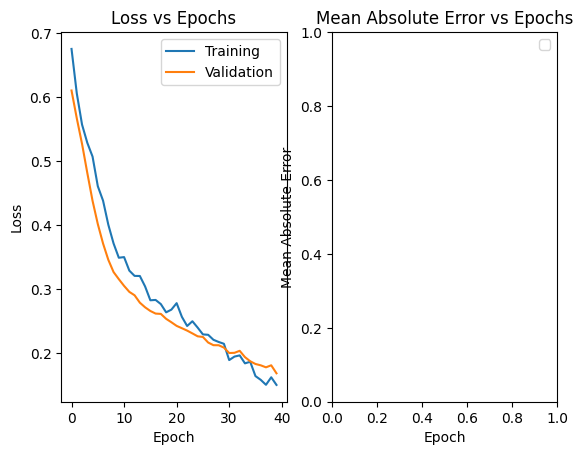

4/4 - 0s - loss: 0.1351 - binary_accuracy: 0.9792 - 60ms/epoch - 15ms/step
[0.13510408997535706, 0.9791666865348816]


2/2 [==============================] - 0s 10ms/step
dubi dubi du
     Iris-setosa  Iris-versicolor  Iris-virginica
68             0                1               0
55             0                1               0
113            0                0               1
99             0                0               0
61             0                1               0
138            0                0               1
69             0                1               0
42             1                0               0
17             1                0               0
54             0                1               0
141            0                0               1
18             1                0               0
93             0                1               0
49             0                0               0
145            0                0               1
33             1

In [ ]:
main()